# NYC Restaurants


Load the data and read the values as strings

In [10]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
df = pd.read_csv('NYC_Restaurants.csv', dtype=str)

In [12]:
df.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [13]:
df.iloc[0]

Unnamed: 0                                                               0
CAMIS                                                             30112340
DBA                                                                WENDY'S
BORO                                                              BROOKLYN
BUILDING                                                               469
STREET                                                     FLATBUSH AVENUE
ZIPCODE                                                              11225
PHONE                                                           7182875005
CUISINE DESCRIPTION                                             Hamburgers
INSPECTION DATE                                                 12/30/2014
ACTION                     Violations were cited in the following area(s).
VIOLATION CODE                                                         06C
VIOLATION DESCRIPTION    Food not protected from potential source of co...
CRITICAL FLAG            

### [Q1. 6 points] Create a unique name for each restaurant 
On the
DataFrame created above, add a new column to your DataFrame, called
’RESTAURANT’, that combines DBA, BUILDING, STREET, ZIPCODE,
and BORO fields. <br>For example, “WENDY’S 469 FLATBUSH AVENUE
11225 BROOKLYN”. Print the first 10 values of the RESTAURANT column
of your DataFrame.

<b>Solution:</b><br>
a. Concatenate the field values using '+' to create the new field as below<br>b. Print the top 10 rows using iloc

In [14]:
## Create a new column and concatenate the field values
df['RESTAURANT'] = df['DBA'] + ' ' + df['BUILDING'] + ' ' + df['STREET'] + ' ' + df['ZIPCODE'] + ' ' + df['BORO']

df['RESTAURANT'].iloc[:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object

### [Q2, 6 points] How many restaurants are included in the data?
Careful now:
• A “Subway” in one particular address (i.e., building, street, zipcode,
and boro) counts as one restaurant; don’t combine all Subways into
one restaurant!
• The data can have multiple violations for the same restaurant!

<b>Solution:</b>
Identify the unique restaurant names(including building, street, zipcode, boro) using unique() and use len() to calculate the count the unique values

In [15]:
## Calculate the length of unique() values under 'RESTAURANTS'
num_restaurants = len(df['RESTAURANT'].unique())
print(f'Total number of restaurants in NYC: {num_restaurants}')

Total number of restaurants in NYC: 10114


### [Q3, 6 points] How many chains are there? 
Let us define a chain to be
the same restaurant name occurring in at least two different (building, street,
zipcode, boro) addresses (i.e., one DBA with multiple restaurant locations).
You’ll see multiple versions of the name ”DUNKIN DONUTS”. Just act
as if they are different chains.

<b>Solution:</b> <br>a. Drop rows with NaN values and rows with duplicate DBA,RESTAURANT combination <br> b. Count the number of DBA values <br> c. Calculate the number of 'DBA' values for which the above is >= 2

In [16]:
## Calculate the number of DBA values in NYC with atleast 2 restaurant addresses
chains = df[['DBA', 'RESTAURANT']].dropna(how = 'any').drop_duplicates()['DBA'].value_counts()
chains = chains[chains > 1]
print(f'Total number of restaurant chains in NYC: {len(chains)}')

Total number of restaurant chains in NYC: 368


### [Q4, 6 points] Plot a bar graph of the top 20 most popular chains.
We already have the chains from the previous problem. Count the number
of restaurants for each chain as a measure of its popularity.

<b> Solution: </b> <br>a. Drop rows with NaN values and rows with duplicate DBA,RESTAURANT combination <br> b. Count the number of DBA values <br> c. Plot the bargraph using plot()

<AxesSubplot:>

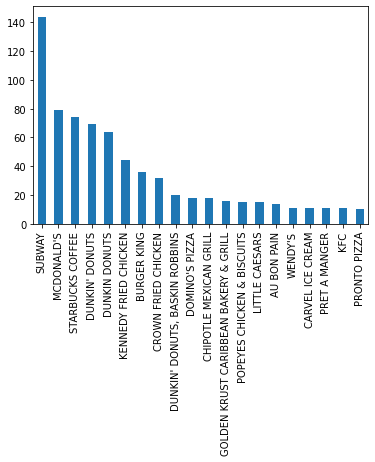

In [17]:
## Plot the graph of top 20 restaurant chains with maximum restaurant outlets
chains[:20].plot(kind = "bar")

### [Q5, 6 points] What fraction of all restaurants are chain restaurants? 
You should think of a restaurant as being one restaurant at one
location. So “Wendy’s 5th Street” and “Wendy’s on 10th Street” are two
different restaurants. Essentially a restaurant is what you defined in Q1.

<b> Solution:</b> <br> Calculate the number of restaurants part of a chain and divide it by the total restaurants

In [19]:
chain_restaurant_perc = sum(chains) / num_restaurants
chain_restaurant_perc

0.16472216729286138

### [Q6, 6 points] Plot the number of non-chain restaurants in each boro. 
First, we need to figure out all the non-chain restaurants, then select
out only those restaurants, and finally plot the number of such restaurants
by boro. Make sure to look at the plot; we don’t want to see... oh... the
“missing” boro.

<b> Solution: </b> <br> a. Create a new column "is_chain". The value in each cell will be true if DBA in that row is in chains list and false if not. <br> b. Use value_counts() to count the number of non-chain restaurants in each borough and plot the values, except 'Missing'

<AxesSubplot:>

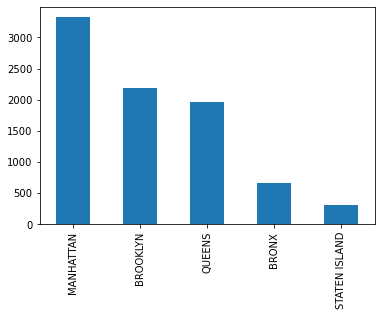

In [20]:
# adding a new column - 'is_chain' tells if a given restaurant is a chain or not.
df['is_chain']  = df['DBA'].apply(lambda x: x in list(chains.index.values))
non_chain_res_boro = df[(df['is_chain'] == False) & (df['BORO'] != 'Missing')]\
                                                    [['RESTAURANT', 'BORO']].\
                                                    drop_duplicates()['BORO'].\
                                                    value_counts()
non_chain_res_boro.plot(kind = 'bar')

### [Q7, 8 points] Plot the fraction of non-chain restaurants in each boro. 
The boro with the most non-chain restaurants might just be the
boro with the most restaurants in general. 
<br> If we want to find the boro that
attracts the most “independent” restauranteurs, we must divide the number
of non-chain restaurants by the total number of restaurants in the boro. Plot
this.<br>
Is the boro with the most independent restaurants also the one with the
highest ratio of independent restaurants?

<b> Solution: </b><br> a. Use value_counts() to count the number of restaurants in each borough <br> b. Calculate fraction of non-chain restaurants to total restaurants in each borough and plot the values, except 'Missing'<br><br> <b>INFERENCE:</b><br> The absolute number of non-chain restaurants in Manhattan is highest with 3323 independent restaurants, however, the highest ratio of non-chain restaurants is in Brooklyn with a value of 0.862 and Manhattan has the third highest ratio of 0.83

<AxesSubplot:>

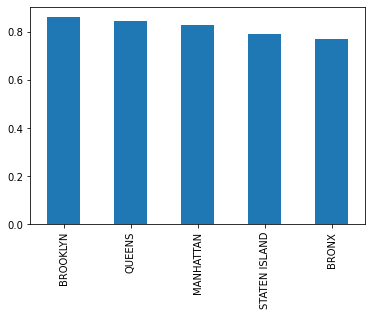

In [26]:
## Calculate the total number of restaurants in each borough
res_boro = df[df['BORO'] != 'Missing'][['RESTAURANT', 'BORO']].\
                                                    drop_duplicates()['BORO'].\
                                                    value_counts()
frac_non_chain = non_chain_res_boro / res_boro
frac_non_chain.sort_values(ascending=False).plot(kind = 'bar')

### [Q8, 6 points] Plot the popularity of cuisines. 
Which cuisines are
the most well-represented among all restaurants? Define the popularity of a
cuisine as the number of restaurants serving that cuisine. <br> Plot the popularity
of the top 20 cuisines.


<b>Solution:</b><br> a. Use the unique_restaurants_df dataframe and value_counts() to calculate the number of unique restaurants serving a particular cuisine <br> b. Plot the top 20 cuisines

<AxesSubplot:>

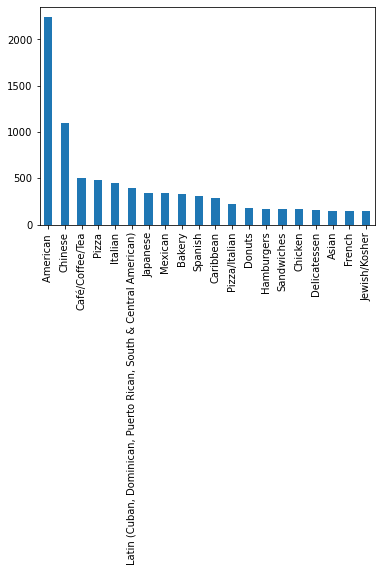

In [30]:
## Identify the popular cuisines in NYC
unique_restaurants_df = df[['RESTAURANT', 'CUISINE DESCRIPTION']].\
                            drop_duplicates()

popular_cuisines = unique_restaurants_df['CUISINE DESCRIPTION'].\
                                            value_counts()

## Plot the top 20 popular cuisines
popular_cuisines[:20].plot(kind='bar')

### [Q9, 9 points] Plot the cuisines among restaurants which never gotcited for violations. 
Ideally, you should explore and see what happens
when there is no violation, but here I will just tell you: the ’VIOLATION
CODE’ field is missing.<br>
First, find the restaurants that were never cited for a code violation. The
compute the popularity of each cuisine among these “clean” restaurants. <br>Plot
the popularity of the top-20 among these cuisines.

<b>Solution:</b><br> a. Identify all the restaurants that have had atleast one violation by using pd.notnull() and unique()<br>b. Create a new column "has_ever_voilated". this cell will be true if Restaurant is in "restaurant voliation" list created in Step a. <br>c. Filter for Restaurants that have never violated and drop duplicates for "Restaurant" and "Cuisine"<br>d. Calculate the count of cuisines for these clean restaurants and plot the top 20 cuisines

<AxesSubplot:>

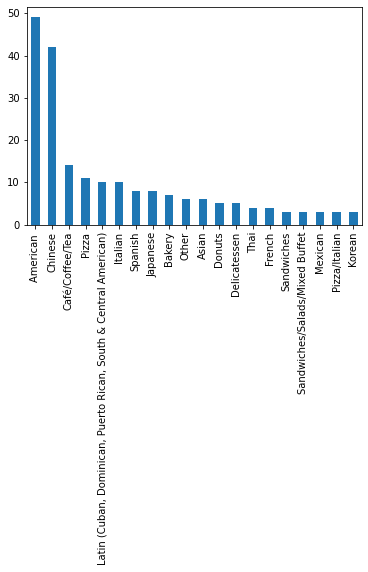

In [32]:
#list of restaurant that never voilated any codes
restaurant_with_voilation = list(df[df['VIOLATION CODE'].notnull()]['RESTAURANT'].unique())

#new column created
df['has_ever_violated'] = df['RESTAURANT'].apply(lambda x: x in restaurant_with_voilation)

# Counting for cuisines using value counts
clean_cuisine = df[df['has_ever_violated'] == False]\
                    [["RESTAURANT", "CUISINE DESCRIPTION"]].drop_duplicates()\
                    ['CUISINE DESCRIPTION'].value_counts()
# plotting the graph
clean_cuisine[:20].plot(kind = 'bar')

### [Q10, 6 points] What cuisines tend to be the “cleanest”?
• Select all cuisines for which there were at least 20 restaurants representing that cuisine.<br>
• For each such cuisine, compute the ratio of the counts in Q9 to Q8.<br>
This is the ratio of restaurants that never got cited, versus total number
of restaurants, for each cuisine.<br>
• Find the top-10 cuisines with the highest ratios; these are that cuisines
whose restaurants are “most likely to be clean.”

<b>Solution:</b><br>a. Use value_counts() to identify cuisines with more than 20 restaurants serving them<br>b. Calculate the ratio of clean restaurants serving the cuisine to total restaurants serving the cuisine<br>c. Sort the ratios in descending order and plot the top 10 cuisines

In [46]:
## Identify cuisines with more than 20 restaurants serving them
mask = unique_restaurants_df['CUISINE DESCRIPTION'].value_counts() >= 20

## Calculate the ratio of clean restaurants serving the cuisine to total restaurants serving the cuisine
## Sort the ratios in descending order 
most_likely_clean = pd.DataFrame(clean_cuisine[mask]/popular_cuisines[mask]).\
                                                dropna().\
                                                sort_values(by = 'CUISINE DESCRIPTION',
                                                            ascending=False)

## Plot the top 10 cuisines using ratio of clean restaurants to total restaurants
most_likely_clean[:10]

,CUISINE DESCRIPTION
Soul Food,0.090909
Vietnamese/Cambodian/Malaysia,0.062500
Other,0.058252
Soups & Sandwiches,0.047619
Continental,0.047619
Barbecue,0.047619
Asian,0.041096
Chinese,0.038251
Greek,0.036364
Peruvian,0.035714


### [Q11, 8 points] What are the most common violations in each borough? 
Create a table of the number of times each violation description
was observed in each borough, and figure out the most common violation
description for each borough.
To create the table, check out the crosstab function. We will see a more
general version of this when we discuss groupby in class.Once you do have the table, you will still need to find the most common
violation description for each borough.

<b>Solution:</b><br>a. Create a crosstab with 'VIOLATION CODE' and 'BORO' counting the number of violation codes in each borough<br>b. Use idxmax() to identify the most common violation code in each borough

In [37]:
## Create crosstab of violation code and borough
violation = pd.Categorical(df['VIOLATION CODE'])
borough = pd.Categorical(df['BORO'])
boro_viol = pd.crosstab(violation, borough)

## Identify most common violation codes in each borough
boro_viol.idxmax()

col_0
BRONX            10F
BROOKLYN         10F
MANHATTAN        10F
Missing          10F
QUEENS           10F
STATEN ISLAND    10F
dtype: object

### [Q12, 9 points] What are the most common violations per borough, after normalizing for the relative abundance of each violation?
Hopefully, the answer to the previous question left you unsatisfied, because
some violations are just very common, irrespective of borough. A better
approach would be to normalize the violation counts, as follows.<br>
• Get overall frequencies: Figure out how common each violation is, over
the entire dataset; let’s call this violationFrequency.<br>
• Normalize: Consider the table of number of violations by boro that
you created for the previous question. For each borough, divide the
number of violations of each type by the total number of violations for
that type; i.e., divide the series of violations by violationFrequency.
We want to do this for each borough.<br>
• Find the biggest violations: Now, after this normalization, for each
borough, figure out the most common violation description.

<b>Solution</b><br>a. Calculate the total count of violation codes irrespective of borough<br>b.Use crosstab with normalize function parameter, which will normalize the values i.e., divide the individual borough violation code count by sum of the total occurences of that violation code across all boroughs<br>c. Use idxmax() to identify the most common violation code in each borough using these normalized values

In [45]:
## Calculate total count of violation codes irrespective of borough
boro_viol.columns = boro_viol.columns.add_categories(['violationFrequency'])
boro_viol['violationFrequency'] = boro_viol.sum(axis = 1)


## Use crosstab with normalize function parameter to normalize the values 
violation = pd.Categorical(df['VIOLATION CODE'])
borough = pd.Categorical(df['BORO'])
boro_viol = pd.crosstab(violation, borough, normalize = 'index')


## Identify the most common violation code in each borough using these normalized values
boro_viol.idxmax()

col_0
BRONX            04I
BROOKLYN         02D
MANHATTAN        03E
Missing          10J
QUEENS           03G
STATEN ISLAND    03C
dtype: object

### [Q13, 8 points] How many phone area codes correspond to a singlezipcode? 
The first three digits of the restaurant phone numbers are their
area codes. The area codes do not generally align with zip codes, but some
area codes are only for a single zip code. You must figure out how many area
codes have this property.<br>
• To extract the first 3 characters of the phone number, recall that strings
are pretty similar to lists.

<b>Solution</b><br>a. Extract the first three digits from phone numbers as the area code<br>b. Count the number of unique area codes attached to a zipcode using nunique()<br>c. Count the number of zipcodes for which only 1 unique area code is attached

In [44]:
## Extract area code from phone number
df['AREA CODE'] = df['PHONE'].str[:3]

## Count the number of zipcodes for which only 1 unique area code is attached
unique_zip_area = (df.groupby(['AREA CODE'])['ZIPCODE'].nunique() == 1).value_counts()[True]

print(f'Number of area codes which are attached to only one zip code: {unique_zip_area}')

Number of area codes which are attached to only one zip code: 34


### [Q14, 10 points] Find common misspellings of street names
Sometimes, it’s Avenue, and sometimes, it’s Ave. We will try to come up with an
automated way to find common misspellings. The idea is the following: if
Ave and Avenue are the same, they should show up often in similar-sounding
street names, e.g., Lexington Ave and Lexington Avenue.<br>
• Create a new column, called STREET TYPE, which is the the last word
in the name of the street. For example, if the street is “Astoria Boulevard”, the street type should be “Boulevard”.<br>
• Create another column, called STREET BASE, which contains everything
but the last word in the name of the street. For example, if the street
is “Astoria Boulevard”, the street base should be “Astoria”.<br>• Create a third column, called STREET BASE & ZIP, that combines the
street base and the zipcode.<br>
• Create a table containing just these three columns, and remove any
duplicates or instances where street base is empty. This table now
contains unique street names, along with the street type.<br>
• Merge this table with itself, on the STREET BASE & ZIP column. Thus,
in the new merged tabled, we will have two STREET TYPE fields for
each street base and zipcode. For example, if both Lexington Ave and
Lexington Avenue exist in the same zipcode, we will get a row for the
street base Lexington and the two street types Ave and Avenue.<br>
• From the merged table, select only the rows where the street types are
different.<br>
• Now, do a cross-tabulation of the two distinct street types (check out
the crosstab function in Pandas). This gives us the number of times
Ave and Avenue were used with the same STREET BASE & ZIP.<br>
• From this cross-tabulation table, find the most commonly street type
that occurs with each of the following: AVE, ST, RD, PL, BOULEARD,
and BULEVARD<br>

<b>Solution:</b><br>a. Create a column 'STREET TYPE' using str.split() on " " delimiter and select the last word as the value for this column<br>b. Create a column 'STREET BASE' using str.split() on " " delimiter and select everything but the last word and concatenate the list elements into a string<br>c. Create a column 'STREET BASE & ZIP' by concatenating the 'STREET BASE' and 'ZIPCODE' column values using '+' operator for string concatenation<br>d. Create a dataframe called street using only 'STREET TYPE','STREET BASE','STREET BASE & ZIP' columns and drop all duplicates<br>e. Merge this table with itself using merge() on 'STREET BASE & ZIP' column<br>f. Pick only the rows where 'STREET TYPE' of first table is != 'STREET TYPE' from second table<br>g. Create a crosstab for the 'STREET TYPE' column of both tables<br>h. Create a list of street names as in question and iterate through all items in the list to return the idxmax() for different street types showing the most common street type that are used inplace of them

In [43]:
## Create a column 'STREET TYPE' using str.split() on " " delimiter 
#  and select the last word as the value for this column<
df['STREET TYPE'] = df['STREET'].str.split().str[-1]


## Create a column 'STREET BASE' using str.split() on " " delimiter and 
## select everything but the last word and concatenate the list elements into a string
df['STREET BASE'] = df['STREET'].apply(lambda x: " ".join(x.split()[:-1]))


## Create a column 'STREET BASE & ZIP' by concatenating the 'STREET BASE' and 'ZIPCODE' column values using '+' 
df['STREET BASE & ZIP'] = df['STREET BASE'] + ' ' +df['ZIPCODE']

## Create a dataframe called street using only 'STREET TYPE','STREET BASE','STREET BASE & ZIP' columns 
## and drop all duplicates
street = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']].\
                                        drop_duplicates().\
                                        dropna(subset=['STREET BASE'])

## Merge this table with itself using merge() on 'STREET BASE & ZIP' column
street_merge = street.merge(street, 
                            left_on='STREET BASE & ZIP',
                            right_on='STREET BASE & ZIP',
                            suffixes=['_street1','_street2'])

## Pick only the rows where 'STREET TYPE' of first table is != 'STREET TYPE' from second table
street_merge = street_merge[street_merge['STREET TYPE_street1'] != street_merge['STREET TYPE_street2']]

##  Create a crosstab for the 'STREET TYPE' column of both tables
misspelling = pd.crosstab(index = street_merge['STREET TYPE_street1'], 
                 columns = street_merge['STREET TYPE_street2'])

for st_type in ['AVE', 'ST', 'RD', 'PL', 'BOULEARD', 'BULEVARD']:
    print (f'Most common street type for {st_type}: {misspelling[st_type].idxmax()}')

Most common street type for AVE: AVENUE
Most common street type for ST: STREET
Most common street type for RD: ROAD
Most common street type for PL: PLACE
Most common street type for BOULEARD: BLVD
Most common street type for BULEVARD: BLVD
